###### K-means Clustering and Principal Component Analysis

1. Implement the K-means clustering algorithm and apply it to compress an image

2. Use principal component analysis to find a low-dimensional representation of face images

In [1]:
import numpy  as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import scipy
import scipy.optimize as opt
import scipy.io as sio
from scipy.io import loadmat

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [3]:
from sklearn.decomposition import PCA

# K-means Clustering

###### load data

In [4]:
path = "dataset/ex7data2.mat"
data = sio.loadmat(path)

X = data['X']
print('X :', X.shape)

X : (300, 2)


###### plot orignal data

In [5]:
def plot_ori_data(data, axes=None):
    if axes == None:
        axes = plt.gca()
    
    axes.scatter(data[:, 0], data[:, 1],
                 marker='o', s=18, lw=1)

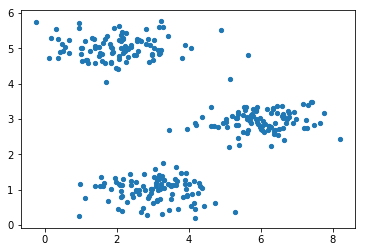

In [6]:
plot_ori_data(X)

## sklearn - KMeans

In [7]:
def sk_kmeans(data, K):
    model = KMeans(K)
    model.fit(data)
    
    return model

In [8]:
model = sk_kmeans(X, 3)

print(">> model.cluster_centers_ : \n", model.cluster_centers_)
print()
print(">> model.labels_[:10] :\n", model.labels_[:10])

>> model.cluster_centers_ : 
 [[3.04367119 1.01541041]
 [1.95399466 5.02557006]
 [6.03366736 3.00052511]]

>> model.labels_[:10] :
 [1 2 2 1 1 1 1 1 1 1]


###### plot final cluster

Text(0.5,1,'K-Means Clustering Results with K=3')

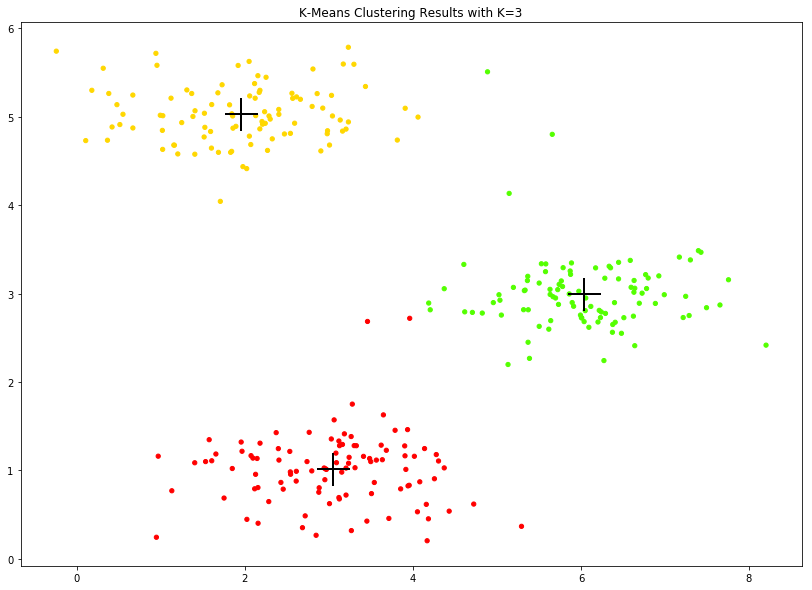

In [9]:
plt.figure(figsize=(14,10))
plt.scatter(X[:,0], X[:,1], c=model.labels_, 
            cmap=plt.cm.prism, marker='o', s=18, linewidths=1)

plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker='+', s=33**2, c='k', lw=2);
plt.title('K-Means Clustering Results with K=3')

## Image compression with K-means

`Apply K-means to image compression`

In [10]:
def load_image(path):
    ori_img = mpl.image.imread(path)
    print("ori_img.shape :", ori_img.shape)
    
    IMG = ori_img.reshape((-1,3))
    
    return ori_img, IMG

In [11]:
ori_img, IMG = load_image('dataset/bird_small.png')

ori_img.shape : (128, 128, 3)


###### apply KMeans on image-data

In [12]:
K = 16
model = sk_kmeans(IMG, K)

print(">> model.cluster_centers_ : \n", model.cluster_centers_)
print()
print(">> model.labels_[:10] :\n", model.labels_[:10])

>> model.cluster_centers_ : 
 [[0.46003547 0.3889325  0.35482588]
 [0.7020072  0.63008714 0.56003463]
 [0.16598767 0.16645652 0.15803555]
 [0.58848065 0.50105476 0.44767562]
 [0.97697294 0.9461336  0.8178476 ]
 [0.8694798  0.71769416 0.45603365]
 [0.6427858  0.46690527 0.20775267]
 [0.9179135  0.5709005  0.25224587]
 [0.084815   0.0918732  0.08166331]
 [0.28119618 0.26053786 0.26249677]
 [0.56806725 0.71939003 0.86784846]
 [0.75730425 0.6052395  0.33839747]
 [0.38700074 0.45751634 0.6457521 ]
 [0.827677   0.7464479  0.7371185 ]
 [0.96371007 0.8595367  0.6318953 ]
 [0.44847327 0.32041547 0.18566185]]

>> model.labels_[:10] :
 [5 5 5 5 5 5 5 5 5 5]


###### plot 2-dim cluster

(0.0, 1.0, 0.0, 1.0)

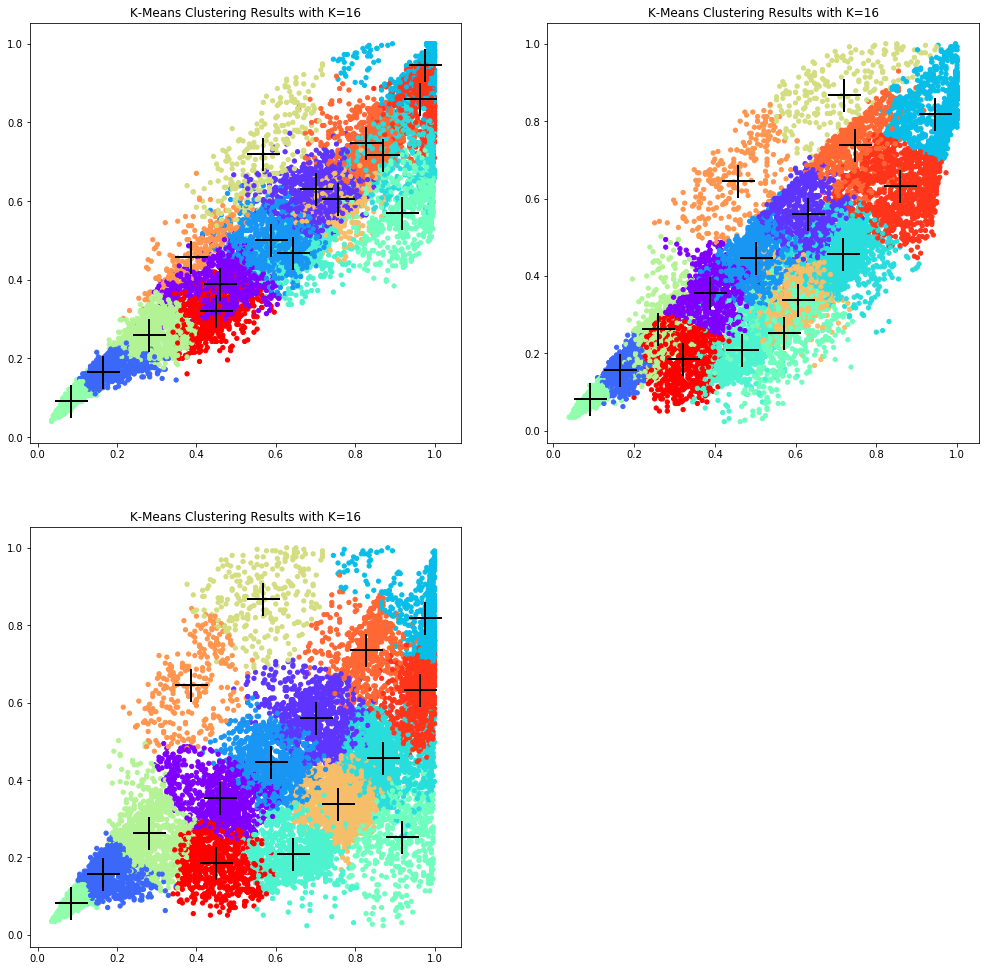

In [13]:
order = [[0,1], [1,2], [0,2]]

fig, axes = plt.subplots(2, 2, figsize=((17, 17)))

for i in range(3):
    axes_i = axes.flatten()[i]
    
    axes_i.scatter(IMG[:,order[i][0]], IMG[:,order[i][1]], c=model.labels_, 
            cmap=plt.cm.rainbow, marker='o', s=18, lw=1)

    axes_i.scatter(model.cluster_centers_[:,order[i][0]], model.cluster_centers_[:,order[i][1]], 
                   marker='+', s=33**2, c='k', lw=2);
    axes_i.set_title('K-Means Clustering Results with K=16')

axes[1][1].axis('off')

###### Image compression

In [14]:
def image_compression(model, ori_shape):
    IMG_compress = model.cluster_centers_[model.labels_]
    IMG_compress = IMG_compress.reshape(ori_shape)
    
    return IMG_compress

In [15]:
IMG_compress = image_compression(model, ori_img.shape)

###### visulization image-compression

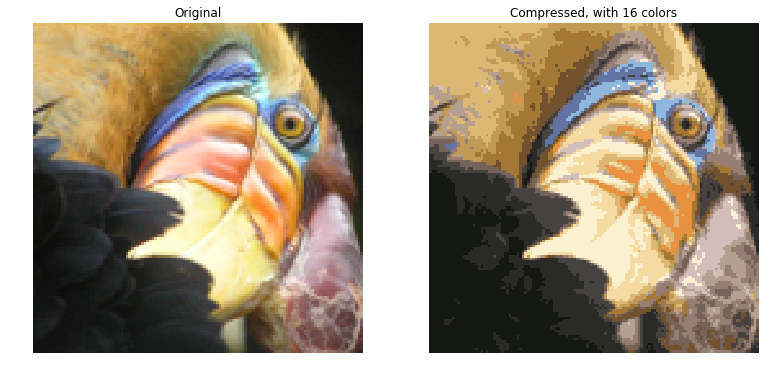

In [16]:
IMG_compress = image_compression(model, ori_img.shape)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,9))
ax1.imshow(ori_img)
ax1.set_title('Original')

ax2.imshow(IMG_compress)
ax2.set_title('Compressed, with 16 colors')

for ax in fig.axes:
    ax.axis('off')

###### KMeans on self-pic

In [17]:
def kmeans_on_picture(path, K):
    # kmeans algorithm on image compression
    ori_img, IMG = load_image(path)
    model = sk_kmeans(IMG, K)
    IMG_compress_flatten = model.cluster_centers_[model.labels_]
    IMG_compress = IMG_compress_flatten.reshape(ori_img.shape)

    # show orignal_image & compression_image
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(13,9))
    ax1.imshow(ori_img)
    ax1.set_title('Original')
    ax2.imshow(IMG_compress)
    ax2.set_title('Compressed, with 16 colors')
    for ax in fig.axes:
        ax.axis('off')

    # show 2-dim cluster centroid [RGB]
    order = [[0,1], [1,2], [0,2]]
    fig, axes = plt.subplots(2, 2, figsize=((17, 17)))
    for i in range(3):
        axes_i = axes.flatten()[i]

        axes_i.scatter(IMG[:,order[i][0]], IMG[:,order[i][1]], c=model.labels_, 
                cmap=plt.cm.rainbow, marker='o', s=4, lw=1)

        axes_i.scatter(model.cluster_centers_[:,order[i][0]], model.cluster_centers_[:,order[i][1]], 
                       marker='+', s=33**2, c='k', lw=2);
        axes_i.set_title('K-Means Clustering Results with K=16')

ori_img.shape : (617, 440, 3)


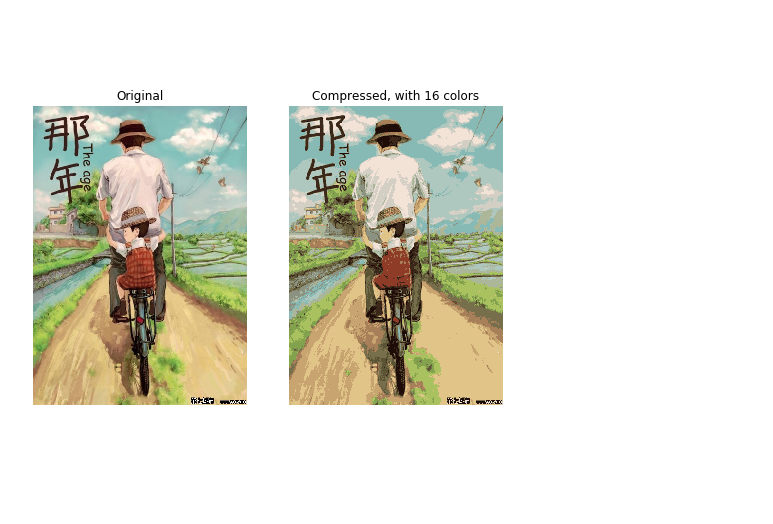

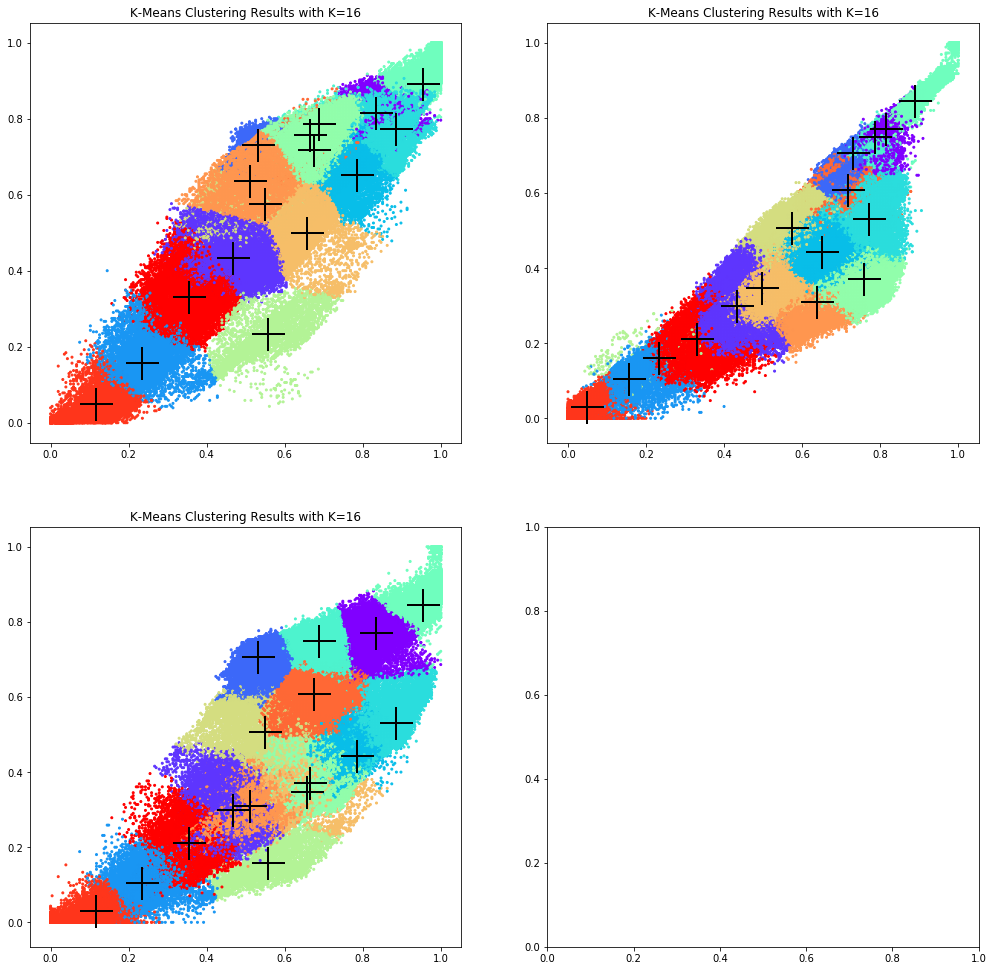

In [18]:
self_picture_dict = ['pic_01', 'pic_02', 'pic_03', 'pic_04', 'pic_05', 'pic_06']
kmeans_on_picture('dataset/pic_04.png', 16)

###### PCA with image-principle-component choose

> + 3-color(RBG) pictrue
> + Kmeans
> + 1. : choose representative color[RGB]
> + 2. : each orignal pixel correspond new color
> + ----- IMage compression

> + PCA
> + 1. : dimension reduction on the `RGB color`, with the objective that reducing data 3-dim to 2-dim, for convenient show, each pixel correspond color use result by kmeans

# Principal Component Analysis

`Use principal component analysis (PCA) to perform dimensionality reduction`.

###### >>> Reduce the data from 2D to 1D

In this part of the exercise, you will visualize what happens when you use PCA to reduce the data from 2D to 1D. In practice, you might want to reduce data from 256 to 50 dimensions, say; but using lower dimensional data in this example allows us to visualize the algorithms better.

In [19]:
path = "dataset/ex7data1.mat"
data = sio.loadmat(path)

X = data['X']

###### plot orignal data

In [20]:
def plot_ori_data(data, axes=None):
    if axes == None:
        axes = plt.gca()
    
    axes.scatter(data[:, 0], data[:, 1],
                 marker='o', s=18, lw=1)

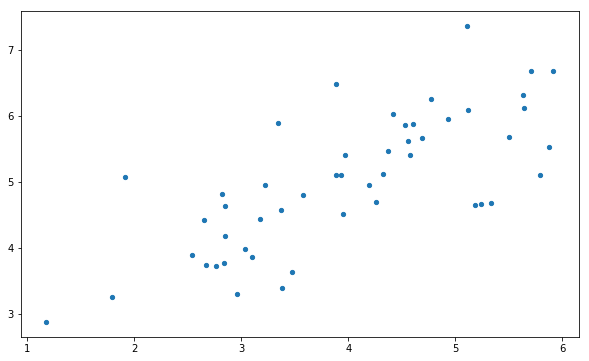

In [21]:
plt.figure(figsize=(10, 6))
plot_ori_data(X, plt.gca())

## Sklearn feature normalization

In [22]:
def sk_scaler(data):
    scaler = preprocessing.StandardScaler()
    scaler.fit(data)

    return scaler

In [23]:
scaler = sk_scaler(X)
X_norm = scaler.transform(X)

## Sklearn Kmeans

In [24]:
def sk_kmeans(data, K):
    model = KMeans(K)
    model.fit(data)
    
    return model

## Sklearn PCA

In [25]:
def sk_pca(data, n_components):    
    pca = PCA(n_components)
    pca.fit(data)
    
    return pca

###### sk-PCA usage

In [26]:
path = "dataset/ex7data1.mat"
data = sio.loadmat(path)

X = data['X']

In [27]:
scaler = sk_scaler(X)
X_norm = scaler.transform(X)

pca = sk_pca(X_norm, 1)
X_compression = pca.transform(X_norm)
X_reconstruct = pca.inverse_transform(X_compression)

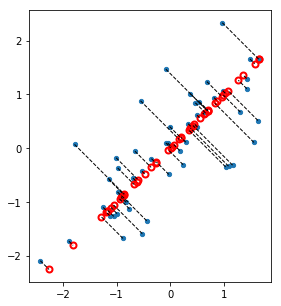

In [28]:
fig, ax = plt.subplots(figsize=(5, 5))
plot_ori_data(X_norm, axes=ax)

ax.set_aspect('equal')
ax.grid(False)

# Draw lines connecting the projected points to the original points
ax.plot(X_reconstruct[:, 0], X_reconstruct[:, 1], 'ro', mec='r', mew=2, mfc='none')
for xnorm, xrec in zip(X_norm, X_reconstruct):
    ax.plot([xnorm[0], xrec[0]], [xnorm[1], xrec[1]], '--k', lw=1)

## Face Image Dataset

In [29]:
path = "dataset/ex7faces.mat"
data = sio.loadmat(path)
X = data['X']

In [30]:
def visualize_data(X):
    img_size = int(np.sqrt(X.shape[1]))
    
    sample_img = X[:100, :]
    sample_img = np.array([im.reshape((img_size, img_size)).T for im in sample_img])
    fig, ax_array = plt.subplots(nrows=10, ncols=10, sharey=True, sharex=True, figsize=(12, 12))
    for r in range(10):
        for c in range(10):
            ax_array[r, c].matshow(sample_img[10 * r + c].reshape((img_size, img_size)),
                                   cmap='gray') # Greys_r
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))

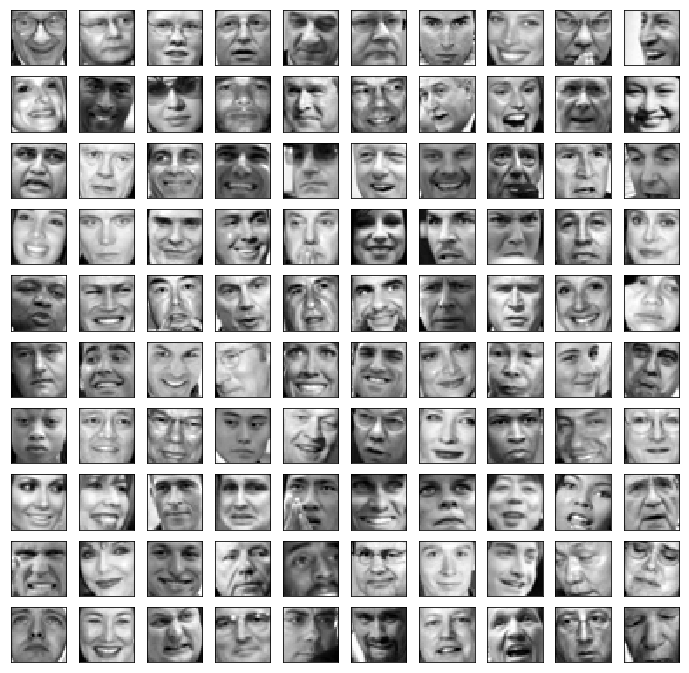

In [31]:
visualize_data(X)

### PCA on Faces

1. To run PCA on the face dataset, we `first normalize the dataset` by subtracting the mean of each feature from the data matrix `X`.
2. After running PCA, you will obtain the principal components of the dataset. Notice that each principal component in `U` (each column) is a vector of length $n$ (where for the face dataset, $n = 1024$). It turns out that we can visualize these principal components by reshaping each of them into a $32 \times 32$ matrix that corresponds to the pixels in the original dataset.

In [32]:
scaler = sk_scaler(X)
X_norm = scaler.transform(X)

pca = sk_pca(X_norm, 100)
X_compression = pca.transform(X_norm)
X_reconstruct = pca.inverse_transform(X_compression)

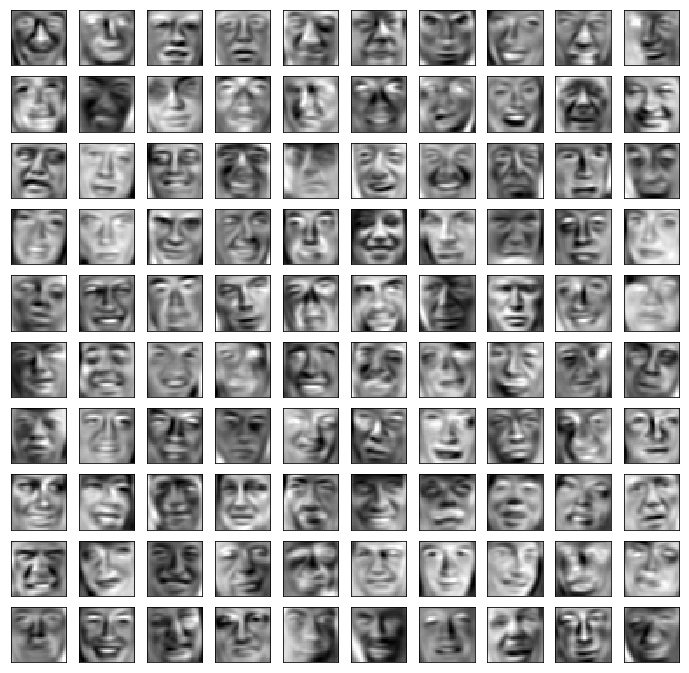

In [33]:
visualize_data(X_reconstruct)

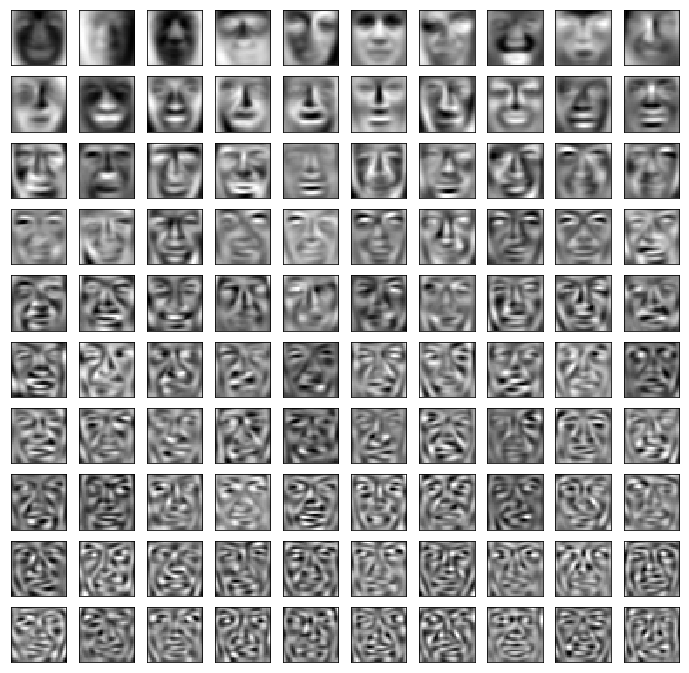

In [34]:
visualize_data(pca.components_)

## PCA for visualization

In the earlier K-means image compression exercise, you used the K-means algorithm in the 3-dimensional RGB space. We reduced each pixel of the RGB image to be represented by 16 clusters.

In the next cell, we have provided code to visualize the final pixel assignments in this 3D space. Each data point is colored according to the cluster it has been assigned to. You can drag your mouse on the figure to rotate and inspect this data in 3 dimensions.

In [35]:
def kmeans_on_picture(path, K):
    # kmeans algorithm on image compression
    ori_img, IMG = load_image(path)
    model = sk_kmeans(IMG, K)
    IMG_compress_flatten = model.cluster_centers_[model.labels_]
    IMG_compress = IMG_compress_flatten.reshape(ori_img.shape)

    # show orignal_image & compression_image
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(13,9))
    ax1.imshow(ori_img)
    ax1.set_title('Original')
    ax2.imshow(IMG_compress)
    ax2.set_title('Compressed, with 16 colors')
    for ax in fig.axes:
        ax.axis('off')

    # PCA reduce 3-dim to 2-dim
    pca = sk_pca(IMG, 2)
    IMG_PCA_compression = pca.transform(IMG)
    IMG_PCA_reconstruct = pca.inverse_transform(IMG_PCA_compression)

    IMG_PCA_3dim = IMG_PCA_reconstruct.reshape(ori_img.shape)
    ax3.imshow(IMG_PCA_3dim)
    ax3.set_title('reconstruct from pca')
    ax3.axis('off')

    # show 2-dim cluster centroid [RGB]
    order = [[0,1], [1,2], [0,2]]
    fig, axes = plt.subplots(2, 2, figsize=((17, 17)))
    for i in range(3):
        axes_i = axes.flatten()[i]

        axes_i.scatter(IMG[:,order[i][0]], IMG[:,order[i][1]], c=model.labels_, 
                cmap=plt.cm.rainbow, marker='o', s=4, lw=1)

        axes_i.scatter(model.cluster_centers_[:,order[i][0]], model.cluster_centers_[:,order[i][1]], 
                       marker='+', s=33**2, c='k', lw=2);
        axes_i.set_title('K-Means Clustering Results with K=16')

    axes[1][1].scatter(IMG_PCA_compression[:,0], IMG_PCA_compression[:,1], cmap=plt.cm.rainbow, c=model.labels_, s=4)
    axes[1][1].set_title('Pixel dataset plotted in 2D, using PCA for dimensionality reduction')
    axes[1][1].grid(False)

ori_img.shape : (617, 440, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


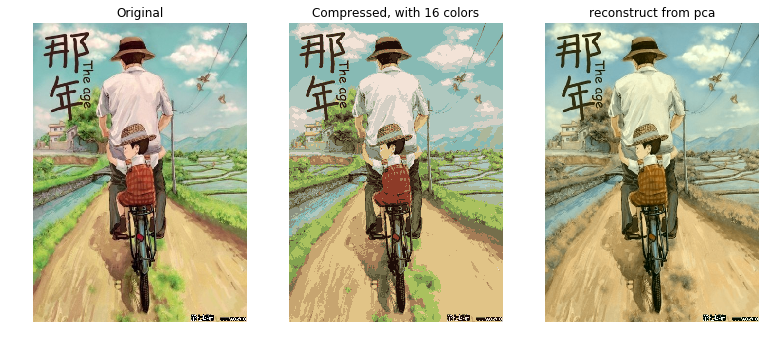

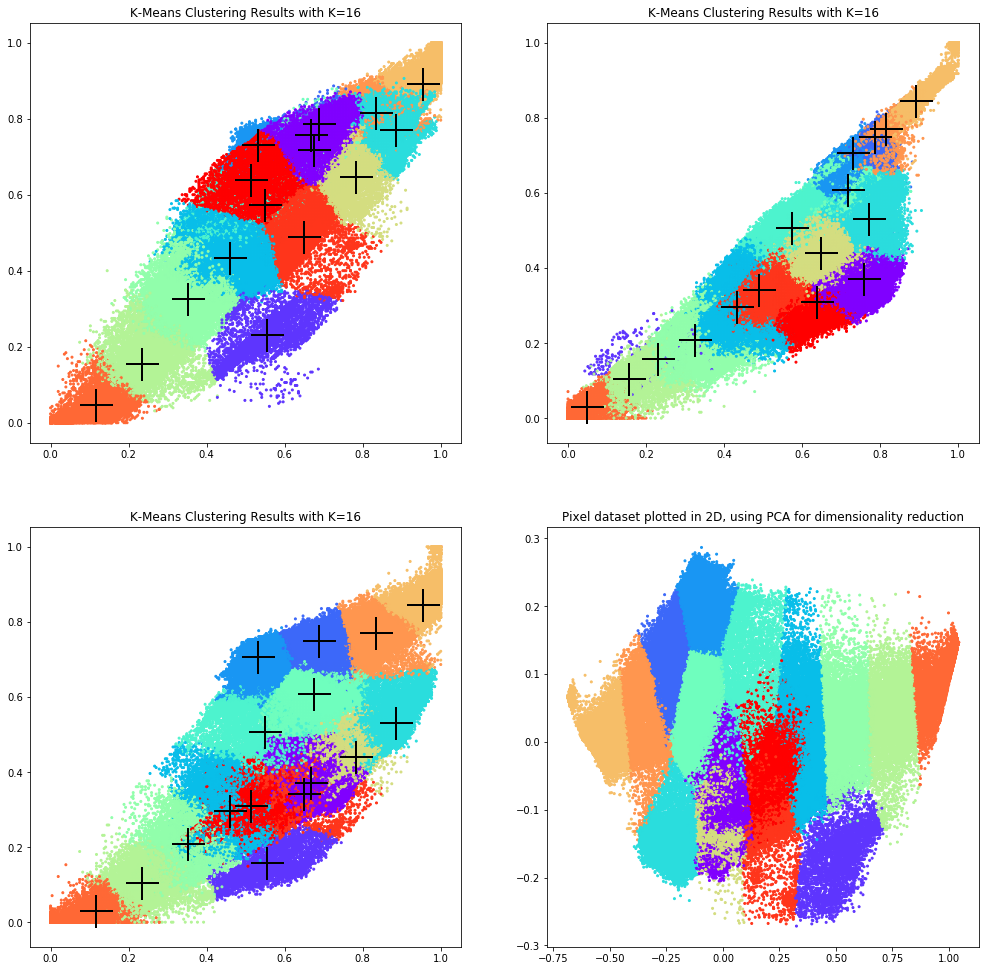

In [36]:
self_picture_dict = ['pic_01', 'pic_02', 'pic_03', 'pic_04', 'pic_05', 'pic_06']
kmeans_on_picture('dataset/pic_04.png', 16)